In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import os
np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [4]:
iris = load_iris()
X = iris.data[:, (2, 3)] 
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

/tmp/ipykernel_5833/1218911015.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


In [5]:
y_pred

array([1])

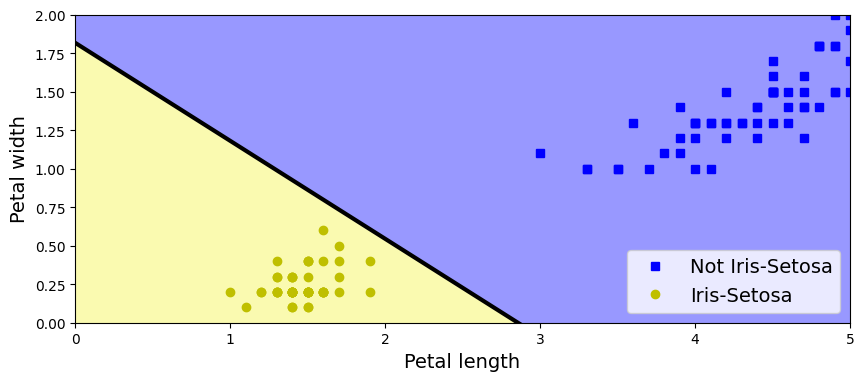

In [6]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

# Activation functions

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

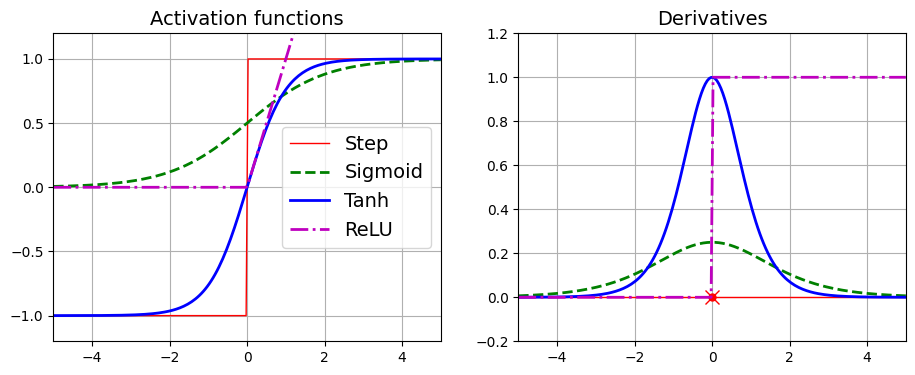

In [8]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

In [9]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

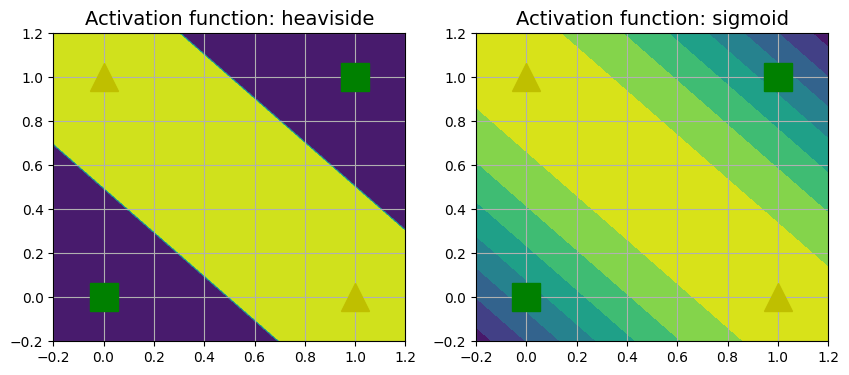

In [10]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [11]:
import tensorflow as tf
from tensorflow import keras

In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [13]:
X_train_full.shape

(60000, 28, 28)

In [14]:
X_train_full.dtype

dtype('uint8')

In [15]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

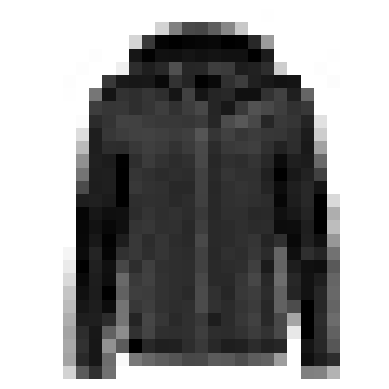

In [16]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [17]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [19]:
class_names[y_train[0]]

'Coat'

In [20]:
X_valid.shape

(5000, 28, 28)

In [21]:
X_test.shape

(10000, 28, 28)

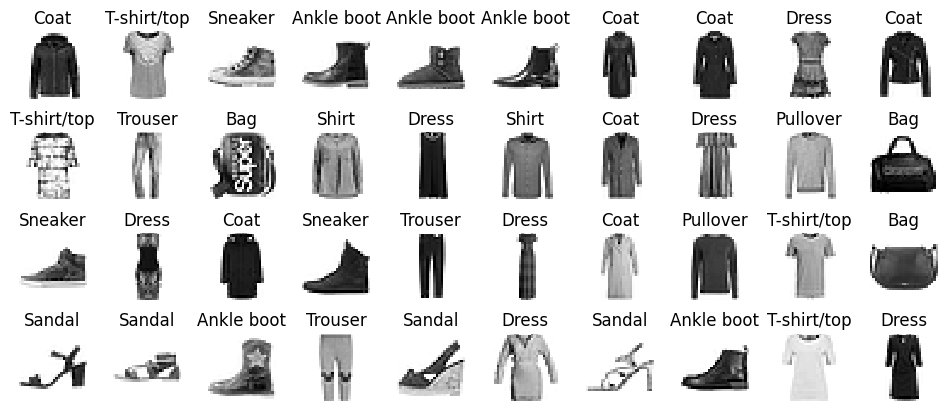

In [22]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

2023-07-27 21:11:19.543728: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-07-27 21:11:19.543807: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ejaj): /proc/driver/nvidia/version does not exist


In [24]:
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

In [25]:
model.layers

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.layers[1].name

'dense'

In [28]:
#model.get_layer('dense_9').name

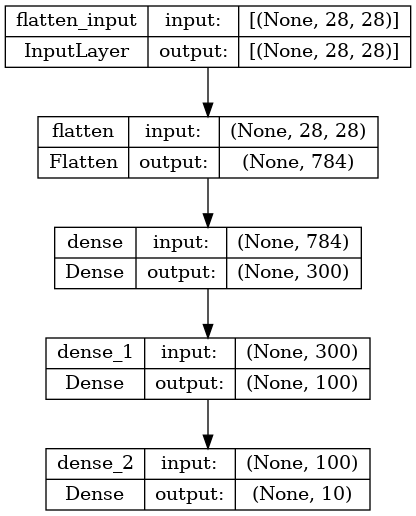

In [29]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [30]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [31]:
model.get_layer(hidden1.name) is hidden1

True

In [32]:
weights, biases = hidden1.get_weights()

In [33]:
weights

array([[ 0.00945003, -0.04330834, -0.01129066, ..., -0.00349033,
         0.05031615,  0.00315432],
       [ 0.05329886,  0.00471833,  0.04998714, ...,  0.03960705,
        -0.02575444, -0.00705984],
       [-0.0704671 ,  0.07399635,  0.04628792, ..., -0.00729886,
         0.04631453, -0.0527815 ],
       ...,
       [ 0.01615269,  0.01413294,  0.01104969, ..., -0.03595048,
         0.00721466,  0.02506251],
       [-0.04586113, -0.01969372, -0.05901246, ..., -0.0260626 ,
         0.02339302,  0.036548  ],
       [-0.06566243,  0.05151132, -0.02042727, ..., -0.00683902,
        -0.06929472, -0.01803624]], dtype=float32)

In [34]:
weights.shape

(784, 300)

In [35]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [36]:
biases.shape

(300,)

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# This is equivalent to:
# model.compile(loss=keras.losses.sparse_categorical_crossentropy,
#               optimizer=keras.optimizers.SGD(),
#               metrics=[keras.metrics.sparse_categorical_accuracy])

In [38]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

2023-07-27 21:11:22.358678: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7224 - accuracy: 0.7614 - val_loss: 0.5483 - val_accuracy: 0.8016
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4881 - accuracy: 0.8300 - val_loss: 0.4610 - val_accuracy: 0.8394
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4405 - accuracy: 0.8447 - val_loss: 0.4176 - val_accuracy: 0.8580
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4127 - accuracy: 0.8563 - val_loss: 0.4010 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3933 - accuracy: 0.8619 - val_loss: 0.3946 - val_accuracy: 0.8652
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3774 - accuracy: 0.8668 - val_loss: 0.3718 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3642 - accuracy: 0.8726 - val_loss: 0.3538 - val_accuracy:

In [39]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [40]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [41]:
history.history

{'loss': [0.7223623394966125,
  0.48805493116378784,
  0.4405280649662018,
  0.4127309322357178,
  0.39334675669670105,
  0.3773746192455292,
  0.364182710647583,
  0.3518565595149994,
  0.3424125611782074,
  0.33326810598373413,
  0.32491666078567505,
  0.31671491265296936,
  0.3098207414150238,
  0.30349159240722656,
  0.29606708884239197,
  0.29017093777656555,
  0.28479906916618347,
  0.27933841943740845,
  0.2733754813671112,
  0.2689811587333679,
  0.2647387683391571,
  0.25894036889076233,
  0.2550816237926483,
  0.25039419531822205,
  0.24630238115787506,
  0.24178080260753632,
  0.2377004325389862,
  0.23438557982444763,
  0.22997675836086273,
  0.22556020319461823],
 'accuracy': [0.7613818049430847,
  0.830018162727356,
  0.8447090983390808,
  0.8563272953033447,
  0.8618727326393127,
  0.8668000102043152,
  0.8726181983947754,
  0.8760727047920227,
  0.8779818415641785,
  0.8816909193992615,
  0.8850545287132263,
  0.8866727352142334,
  0.8894909024238586,
  0.89092725515365

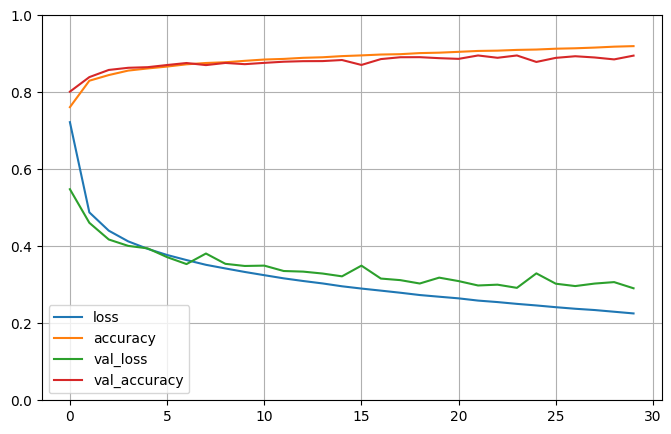

In [42]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [43]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3232 - accuracy: 0.8831


[0.32322826981544495, 0.8830999732017517]

In [44]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 257ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [45]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 20ms/step


array([9, 2, 1])

In [46]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [47]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

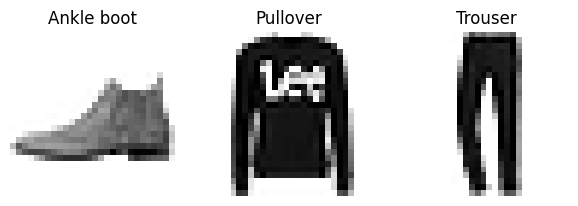

In [48]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Regression MLP

In [49]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

In [50]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [51]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

In [52]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [54]:
np.random.seed(42)
tf.random.set_seed(42)

In [55]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [56]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4875 - val_loss: 0.4656

In [57]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4212


In [58]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 130ms/step


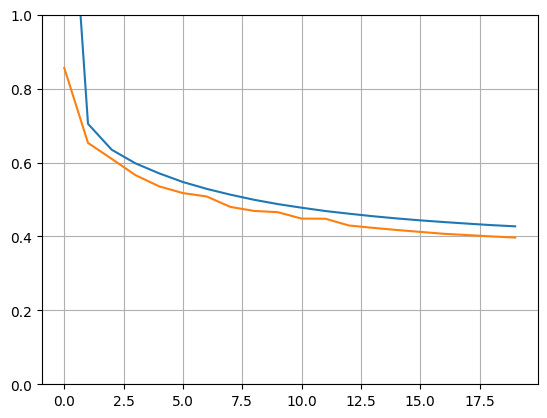

In [59]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [60]:
y_pred

array([[0.38856634],
       [1.6792021 ],
       [3.1022797 ]], dtype=float32)

# Functional API

In [61]:
np.random.seed(42)
tf.random.set_seed(42)

In [62]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [63]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [64]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [65]:
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4659 - val_loss: 0.4313

In [66]:
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 60ms/step


***you want to send different subsets of input features through the wide or deep paths***

In [67]:
np.random.seed(42)
tf.random.set_seed(42)

In [68]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [69]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [70]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [71]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8145 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6771 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5979 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5584 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5334 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5120 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4970 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4843 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4730 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4644 - val_loss: 0.4315

In [72]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

1/1 [==============================] - 0s 58ms/step


***Adding an auxiliary output for regularization:***

In [73]:
np.random.seed(42)
tf.random.set_seed(42)

In [74]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [75]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [76]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1365 - main_output_loss: 1.9196 - aux_output_loss: 4.0890 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8905 - main_output_loss: 0.6969 - aux_output_loss: 2.6326 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7429 - main_output_loss: 0.6088 - aux_output_loss: 1.9499 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6771 - main_output_loss: 0.5691 - aux_output_loss: 1.6485 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6381 - main_output_loss: 0.5434 - aux_output_loss: 1.4911 - val_loss

In [77]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 65ms/step


# The subclassing API

In [78]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [79]:
model = WideAndDeepModel(30, activation="relu")

In [80]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10, validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.3298 - output_1_loss: 2.2186 - output_2_loss: 3.3304 - val_loss: 2.1435 - val_output_1_loss: 1.1581 - val_output_2_loss: 11.0117
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9714 - output_1_loss: 0.8543 - output_2_loss: 2.0252 - val_loss: 1.7567 - val_output_1_loss: 0.8205 - val_output_2_loss: 10.1825
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8268 - output_1_loss: 0.7289 - output_2_loss: 1.7082 - val_loss: 1.5664 - val_output_1_loss: 0.7913 - val_output_2_loss: 8.5419
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7636 - output_1_loss: 0.6764 - output_2_loss: 1.5477 - val_loss: 1.3088 - val_output_1_loss: 0.6549 - val_output_2_loss: 7.1933
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7211 - output_1_loss: 0.6402 - output_2_loss: 1.4489 - val_loss: 1.1357 - val_output_1_loss: 0.5964 - val_

In [81]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

1/1 [==============================] - 0s 63ms/step


# Saving and Restoring

In [82]:
np.random.seed(42)
tf.random.set_seed(42)

In [83]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [84]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4382


In [85]:
model.save("my_keras_model.h5")

In [86]:
model = keras.models.load_model("my_keras_model.h5")

In [87]:
model.predict(X_new)

1/1 [==============================] - 0s 61ms/step


array([[0.54002357],
       [1.650597  ],
       [3.009824  ]], dtype=float32)

In [88]:
model.save_weights("my_keras_weights.ckpt")

In [89]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

In [90]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [91]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
]) 

In [92]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [93]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [94]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4474 - val_loss: 0.4379

In [95]:
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4382


In [96]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [97]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3976 - val_lo

363/363 [==============================] - 1s 2ms/step - loss: 0.3324 - val_loss: 0.3276
Epoch 82/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3320 - val_loss: 0.3167
Epoch 83/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3317 - val_loss: 0.3280
Epoch 84/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3312 - val_loss: 0.3636
Epoch 85/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3310 - val_loss: 0.3176
Epoch 86/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3308 - val_loss: 0.3156
Epoch 87/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3305 - val_loss: 0.3529
Epoch 88/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3299 - val_loss: 0.3255
Epoch 89/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3294 - val_loss: 0.3627
Epoch 90/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3296 - val_loss: 

In [98]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3310


In [99]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [100]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])


359/363 [============================>.] - ETA: 0s - loss: 0.3294
val/train: 1.08
363/363 [==============================] - 1s 2ms/step - loss: 0.3302 - val_loss: 0.3561


# TensorBoard

In [101]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [102]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2023_07_27-21_16_53'

In [103]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [104]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [105]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4474 - val_loss: 0.4379

# Hyperparameter Tuning

In [106]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [107]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [108]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [109]:
import sklearn
print(sklearn.__version__)

1.2.0


In [110]:
import tensorflow as tf
from tensorflow import keras
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/tmp/ipykernel_5833/384842707.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [111]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4060 - val_l

363/363 [==============================] - 1s 2ms/step - loss: 0.3384 - val_loss: 0.3423
Epoch 82/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3371 - val_loss: 0.3253
Epoch 83/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3368 - val_loss: 0.3250
Epoch 84/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3362 - val_loss: 0.3977
Epoch 85/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3372 - val_loss: 0.3437
Epoch 86/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3359 - val_loss: 0.3189
Epoch 87/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3356 - val_loss: 0.3262
Epoch 88/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3351 - val_loss: 0.3315
Epoch 89/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3349 - val_loss: 0.3232
Epoch 90/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3344 - val_loss: 

In [112]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3346


In [113]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 51ms/step


In [114]:
np.random.seed(42)
tf.random.set_seed(42)

In [115]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8420 - val_loss: 0.4703
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4815 - val_loss: 0.4247
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4519 - val_loss: 0.4052
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4429 - val_loss: 0.3975
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4368 - val_loss: 0.3991
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4340 - val_loss: 0.4031
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4351 - val_loss: 0.4043
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4267 - val_loss: 0.3929
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4258 - val_loss: 0.4040
Epoch 10/100
242/242 [========

Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3678 - val_loss: 0.8462
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3610 - val_loss: 0.8724
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3554 - val_loss: 0.9645
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3525 - val_loss: 0.7225
Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3475 - val_loss: 0.7257
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3442 - val_loss: 0.7217
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3422 - val_loss: 0.8443
Epoch 14/100
121/121 [==============================] - 0s 1ms/step - loss: 0.3650
[CV] END learning_rate=0.005432590230265343, n_hidden=2, n_neurons=94; total time=   7.3s
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0015 - val_loss: 2.9433
Epoch 2/100
242

242/242 [==============================] - 0s 2ms/step - loss: 0.5504 - val_loss: 0.5116
Epoch 28/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5453 - val_loss: 0.5076
Epoch 29/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5403 - val_loss: 0.5035
Epoch 30/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5356 - val_loss: 0.4989
Epoch 31/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5309 - val_loss: 0.4946
Epoch 32/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5265 - val_loss: 0.4915
Epoch 33/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5222 - val_loss: 0.4883
Epoch 34/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5181 - val_loss: 0.4856
Epoch 35/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5141 - val_loss: 0.4828
Epoch 36/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5103 - val_loss: 

Epoch 16/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6395 - val_loss: 1.5300
Epoch 17/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6303 - val_loss: 1.3410
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6217 - val_loss: 1.1762
Epoch 19/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6133 - val_loss: 1.0345
Epoch 20/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6055 - val_loss: 0.9174
Epoch 21/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5980 - val_loss: 0.8153
Epoch 22/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5908 - val_loss: 0.7363
Epoch 23/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5839 - val_loss: 0.6696
Epoch 24/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5774 - val_loss: 0.6187
Epoch 25/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5711

Epoch 56/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4607 - val_loss: 0.4349
Epoch 57/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4588 - val_loss: 0.4330
Epoch 58/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4569 - val_loss: 0.4311
Epoch 59/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4550 - val_loss: 0.4291
Epoch 60/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4532 - val_loss: 0.4277
Epoch 61/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4515 - val_loss: 0.4257
Epoch 62/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4498 - val_loss: 0.4241
Epoch 63/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4482 - val_loss: 0.4224
Epoch 64/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4466 - val_loss: 0.4208
Epoch 65/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4451

Epoch 35/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3527 - val_loss: 0.3474
Epoch 36/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3508 - val_loss: 0.3944
Epoch 37/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3507 - val_loss: 0.4401
Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3502 - val_loss: 0.4721
Epoch 39/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3495 - val_loss: 0.3722
Epoch 40/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3481 - val_loss: 0.4018
Epoch 41/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3467 - val_loss: 0.3376
Epoch 42/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3449 - val_loss: 0.3377
Epoch 43/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3450 - val_loss: 0.3354
Epoch 44/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3433

242/242 [==============================] - 0s 2ms/step - loss: 0.3914 - val_loss: 0.3974
Epoch 19/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3887 - val_loss: 0.4229
Epoch 20/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3860 - val_loss: 0.4053
Epoch 21/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3840 - val_loss: 0.3989
Epoch 22/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3815 - val_loss: 0.3957
Epoch 23/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3793 - val_loss: 0.3864
Epoch 24/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3774 - val_loss: 0.4022
Epoch 25/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3756 - val_loss: 0.3729
Epoch 26/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3733 - val_loss: 0.3645
Epoch 27/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3716 - val_loss: 

242/242 [==============================] - 0s 2ms/step - loss: 4.2841 - val_loss: 559.4487
Epoch 22/100
121/121 [==============================] - 0s 1ms/step - loss: 0.6226
[CV] END learning_rate=0.01824796188192035, n_hidden=0, n_neurons=40; total time=   9.5s
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.2632 - val_loss: 1.4543
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6364 - val_loss: 0.9557
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5396 - val_loss: 0.4628
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4783 - val_loss: 0.4214
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4400 - val_loss: 0.3984
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4169 - val_loss: 0.4056
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4004 - val_loss: 0.3741
Epoch 8/100
242/242 [=========

242/242 [==============================] - 0s 2ms/step - loss: 0.3231 - val_loss: 0.3355
Epoch 40/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3204 - val_loss: 0.3711
Epoch 41/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3180 - val_loss: 0.3242
Epoch 42/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3165 - val_loss: 0.3677
Epoch 43/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3161 - val_loss: 0.3060
Epoch 44/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3145 - val_loss: 0.3946
Epoch 45/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3166 - val_loss: 0.3159
Epoch 46/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3136 - val_loss: 0.3418
Epoch 47/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3117 - val_loss: 0.3029
Epoch 48/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3117 - val_loss: 

Epoch 31/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3864 - val_loss: 0.3717
Epoch 32/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3851 - val_loss: 0.3676
Epoch 33/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3837 - val_loss: 0.4054
Epoch 34/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3825 - val_loss: 0.3924
Epoch 35/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3815 - val_loss: 0.3611
Epoch 36/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3800 - val_loss: 0.4182
Epoch 37/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3792 - val_loss: 0.3539
Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3779 - val_loss: 0.4403
Epoch 39/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3769 - val_loss: 0.3551
Epoch 40/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3757

Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4475 - val_loss: 8.6077
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4779 - val_loss: 1.8033
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4008 - val_loss: 0.3655
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3682 - val_loss: 0.3784
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3591 - val_loss: 0.4055
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3533 - val_loss: 0.3909
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3488 - val_loss: 0.3910
Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3445 - val_loss: 0.3554
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3394 - val_loss: 0.3611
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3352 - val

242/242 [==============================] - 0s 2ms/step - loss: 0.3105 - val_loss: 0.3139
Epoch 26/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3071 - val_loss: 0.3399
Epoch 27/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3056 - val_loss: 0.3114
Epoch 28/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3044 - val_loss: 0.3455
Epoch 29/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3049 - val_loss: 0.3815
Epoch 30/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3037 - val_loss: 0.3129
Epoch 31/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3000 - val_loss: 0.3150
Epoch 32/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2977 - val_loss: 0.3082
Epoch 33/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2979 - val_loss: 0.3245
Epoch 34/100
121/121 [==============================] - 0s 1ms/step - loss: 0.3059
[CV] END lea

242/242 [==============================] - 0s 2ms/step - loss: 0.3755 - val_loss: 0.6378
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3647 - val_loss: 0.8581
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3602 - val_loss: 1.0634
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3516 - val_loss: 1.1222
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3456 - val_loss: 1.2239
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3424 - val_loss: 0.7991
Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3374 - val_loss: 0.8275
Epoch 12/100
121/121 [==============================] - 0s 1ms/step - loss: 0.3593
[CV] END learning_rate=0.0059640580092043885, n_hidden=3, n_neurons=80; total time=   6.6s
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8683 - val_loss: 2.2007
Epoch 2/100
242/242 [=======

242/242 [==============================] - 0s 2ms/step - loss: 0.3587 - val_loss: 0.3709
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3579 - val_loss: 0.3816
Epoch 15/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3534 - val_loss: 0.3620
Epoch 16/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3528 - val_loss: 0.3670
Epoch 17/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3490 - val_loss: 0.3671
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3474 - val_loss: 0.3605
Epoch 19/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3445 - val_loss: 0.3552
Epoch 20/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3421 - val_loss: 0.3538
Epoch 21/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3417 - val_loss: 0.3520
Epoch 22/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3388 - val_loss: 

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1315 - val_loss: 2.8528
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6016 - val_loss: 2.3412
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5108 - val_loss: 0.9015
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4594 - val_loss: 0.8313
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4291 - val_loss: 0.5217
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4115 - val_loss: 0.4956
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4016 - val_loss: 0.3745
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3917 - val_loss: 0.4012
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3848 - val_loss: 0.4169
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3815 - val_lo

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fd65ef3a6e0>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112298,...
                                                          0.005021425736625637,
                                                          0.0005703073595961105,
                                                          0.001151888789941251,
                                                          0.001621231156394198,
                                                          0.0024505367684280487,
                                                          0.011155092541719619,
                                                          0.0007524347058135697,
                                                          0.0032032448128444043,
                                                          0.004591455636549438,
                                                          0.0003715541189658278, ...],
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...]},
                   verbose=2)

In [116]:
rnd_search_cv.best_params_

{'n_neurons': 80, 'n_hidden': 3, 'learning_rate': 0.0059640580092043885}

In [117]:
rnd_search_cv.best_score_

-0.3216290275255839

In [118]:
rnd_search_cv.best_estimator_

In [119]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3072


-0.3071604073047638

In [120]:
model = rnd_search_cv.best_estimator_.model
model

In [121]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3072


0.3071604073047638

# Exercise: Train a deep MLP on the MNIST dataset

In [122]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [123]:
X_train_full.shape

(60000, 28, 28)

In [124]:
X_train_full.dtype

dtype('uint8')

In [125]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

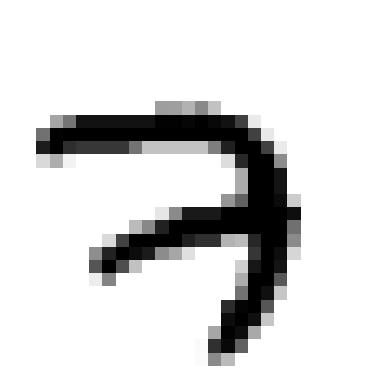

In [126]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [127]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [128]:
X_valid.shape

(5000, 28, 28)

In [129]:
X_test.shape

(10000, 28, 28)

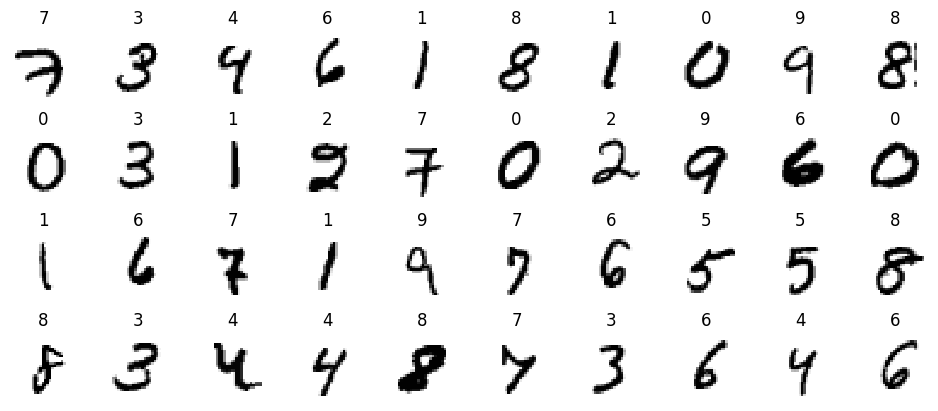

In [130]:
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [131]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [132]:

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [133]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [135]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [136]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

2023-07-27 21:34:06.252214: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 8s 5ms/step - loss: 95363524095301836574031872.0000 - accuracy: 0.5738 - val_loss: 2.3911 - val_accuracy: 0.1126


Text(0, 0.5, 'Loss')

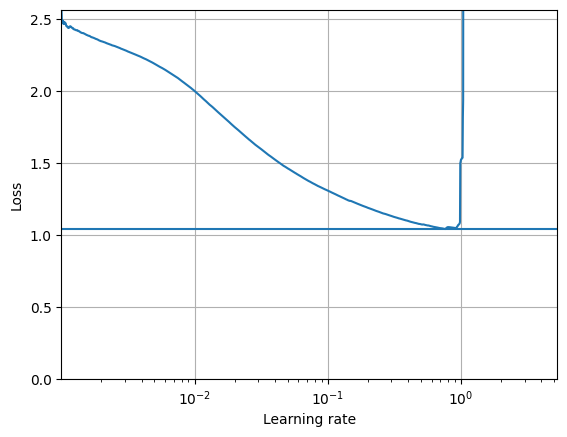

In [137]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [138]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [139]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [140]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [141]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [142]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100


2023-07-27 21:35:18.157456: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 7s 4ms/step - loss: 0.2360 - accuracy: 0.9262 - val_loss: 0.1088 - val_accuracy: 0.9678
Epoch 2/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0942 - accuracy: 0.9703 - val_loss: 0.1146 - val_accuracy: 0.9668
Epoch 3/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0660 - accuracy: 0.9796 - val_loss: 0.0784 - val_accuracy: 0.9756
Epoch 4/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0480 - accuracy: 0.9847 - val_loss: 0.0765 - val_accuracy: 0.9790
Epoch 5/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0359 - accuracy: 0.9882 - val_loss: 0.0706 - val_accuracy: 0.9824
Epoch 6/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0316 - accuracy: 0.9900 - val_loss: 0.0747 - val_accuracy: 0.9806
Epoch 7/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.0935 - val_accuracy: 0.97

In [143]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0762 - accuracy: 0.9783


[0.07616167515516281, 0.9782999753952026]